In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
#print(os.listdir("D:/Pryanka/Edvancer/data/stacksample"))

# Plotting Libs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
# magic function
%matplotlib inline
import collections
import nltk

2024-06-04 07:22:14.627718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
df_tags = pd.read_csv('Tags.csv', encoding='iso-8859-1')

In [4]:
def plot_tags(tagCount):
    
    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired  
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]   

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

[('c#', 17173), ('java', 11759), ('php', 11100), ('javascript', 9442), ('jquery', 8339), ('.net', 7621), ('iphone', 7432), ('asp.net', 7197), ('c++', 6879), ('android', 5904)]


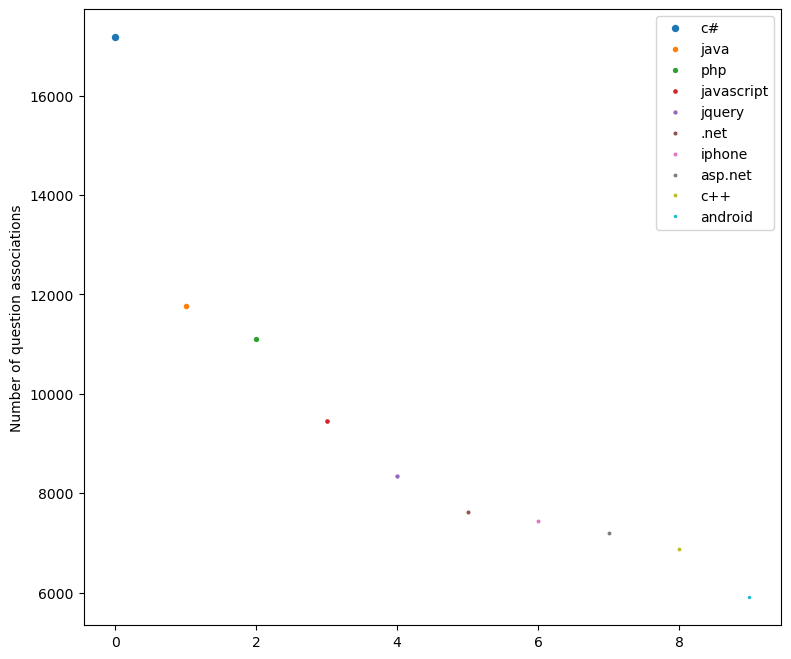

In [5]:
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [6]:
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']

In [7]:
tag_top10= df_tags[df_tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head()

(82381, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [8]:
tag_top10['Id'].value_counts().head(10)

Id
4009250    5
2593090    4
3717040    4
5765750    4
4505080    4
3894590    4
2648730    4
3018760    4
5565540    4
3874280    4
Name: count, dtype: int64

In [9]:
tag_top10.head()

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [10]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [11]:
len(top10),tag_top10.shape

(82381, (82381, 2))

In [12]:
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]


In [13]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(82381, 2)

In [14]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [15]:
ques = pd.read_csv('question_clean.csv', encoding='iso-8859-1')
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [16]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

(27, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from tensorflow.keras.models import Model

2024-06-05 16:24:14.906068: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['c#', 'c++', 'html', 'java', 'javascript', 'php'], dtype=object)

In [19]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [20]:
train.shape,test.shape

((20, 4), (7, 4))

In [21]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/916e044b-5479-4af7-ad52-
[nltk_data]     3b3f37722363/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

16

In [24]:
np.quantile(sent_lens_t,0.97)

15.43

In [25]:
max_len_t = 18
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_t)
sequences_train_t = tok.texts_to_sequences(X_train_t)

In [26]:
vocab_len_t=len(tok.index_word.keys())
vocab_len_t

111

In [27]:
sequences_matrix_train_t = sequence.pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  26,  27,
          1,  28,  29,  30,  31],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   1,  32,  33,
          3,  34,  11,  12,  35],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  36,  37,  38],
       [  0,   0,   0,   0,   0,   0,   0,   2,   8,  13,  39,   3,  14,
         15,   5,  40,   4,  41],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  16,   6,   9,
         42,  17,  43,  44,  45],
       [  0,   0,   0,   0,   0,   0,   0,  46,  47,  48,  49,   8,  13,
         18,   4,  50,   9,  51],
       [  0,   0,   0,   0,   0,   0,   0,   0,   2,   1,  52,  53,  54,
         55,   4,  14,  15,   5],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56,  57,   4,
         58,  19,  59,  60,  61],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         62,  12,   3,  10,  11],
       [  0,   0,   0,   0,   0,   0,

In [28]:
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = sequence.pad_sequences(sequences_test_t,maxlen=max_len_t)

In [29]:
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape

((20, 18), (7, 18), (20, 6), (7, 6))

In [30]:
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

286

In [31]:
np.quantile(sent_lens_b,0.90)

215.60000000000002

In [32]:
max_len_b = 600
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [33]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b 

757

In [34]:
sequences_matrix_train_b = sequence.pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[  0,   0,   0, ...,   5, 319, 192],
       [  0,   0,   0, ..., 130,  13,  42],
       [  0,   0,   0, ...,  13, 341, 197],
       ...,
       [  0,   0,   0, ...,  19,  68, 308],
       [  0,   0,   0, ..., 735,   8,  39],
       [  0,   0,   0, ..., 310,  53, 309]], dtype=int32)

In [35]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = sequence.pad_sequences(sequences_test_b,maxlen=max_len_b)

In [36]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((20, 18), (20, 600), (20, 6))

In [37]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((7, 18), (7, 600), (7, 6))

In [98]:
def RNN():
    # Title Only
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
    # auxiliary output to tune GRU weights smoothly 
    auxiliary_output = Dense(6, activation='sigmoid', name='aux_output')(gru_out_t)   
    
    # Body Only
    body_input = Input(name='body_input',shape=[max_len_b]) 
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)
    
    # combined with GRU output
    com = concatenate([gru_out_t, gru_out_b])
    
    # now the combined data is being fed to dense layers
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1) 
    dense2 = Dense(150,activation='relu')(bn)
    
    main_output = Dense(6, activation='sigmoid', name='main_output')(dense2)
    
    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    
    model.compile(optimizer='adam',loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},metrics=['accuracy'])
    return model

In [100]:
model = RNN()
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 title_input (InputLayer)       [(None, 18)]         0           []                               
                                                                                                  
 body_input (InputLayer)        [(None, 600)]        0           []                               
                                                                                                  
 title_Embed (Embedding)        (None, 18, 2000)     224000      ['title_input[0][0]']            
                                                                                                  
 body_Embed (Embedding)         (None, 600, 170)     128860      ['body_input[0][0]']             
                                                                                            

In [102]:
results= model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=5, batch_size=800)

Epoch 1/5
1/1 [==============================] - 13s 13s/step - loss: 3.8169 - main_output_loss: 2.0221 - aux_output_loss: 1.7948 - main_output_accuracy: 0.0500 - aux_output_accuracy: 0.1500 - val_loss: 3.5440 - val_main_output_loss: 1.7776 - val_aux_output_loss: 1.7663 - val_main_output_accuracy: 0.4286 - val_aux_output_accuracy: 0.7143
Epoch 2/5
1/1 [==============================] - 2s 2s/step - loss: 2.9520 - main_output_loss: 1.1659 - aux_output_loss: 1.7861 - main_output_accuracy: 0.6500 - aux_output_accuracy: 0.1500 - val_loss: 3.5204 - val_main_output_loss: 1.7665 - val_aux_output_loss: 1.7539 - val_main_output_accuracy: 0.5714 - val_aux_output_accuracy: 0.7143
Epoch 3/5
1/1 [==============================] - 2s 2s/step - loss: 2.6721 - main_output_loss: 0.9042 - aux_output_loss: 1.7678 - main_output_accuracy: 0.7500 - aux_output_accuracy: 0.2500 - val_loss: 3.4943 - val_main_output_loss: 1.7523 - val_aux_output_loss: 1.7420 - val_main_output_accuracy: 0.4286 - val_aux_output_a

In [104]:
(predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)

1/1 [==============================] - 2s 2s/step


In [105]:
from sklearn.metrics import classification_report,f1_score

In [108]:
print(f1_score(y_test,predicted_main>.55,average='samples'))

0.0


In [110]:
print(classification_report(y_test,predicted_main>.55))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2

   micro avg       0.00      0.00      0.00         7
   macro avg       0.00      0.00      0.00         7
weighted avg       0.00      0.00      0.00         7
 samples avg       0.00      0.00      0.00         7



/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-ai-2023-11/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/

In [118]:
test.iloc[4,0]

7470

In [122]:
predicted_main[4].round(decimals = 2)

array([0.52, 0.5 , 0.49, 0.5 , 0.49, 0.51], dtype=float32)

In [124]:
labels

array(['c#', 'c++', 'html', 'java', 'javascript', 'php'], dtype=object)

In [ ]:
model.save('stackoverflow_tags.h5')